# Importing Packages:

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import math
from joblib import dump, load

## Reading Collected Data:

In [263]:
# Load the data
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)

## Processing Dataset:

In [264]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Dataset is very large. Choosing sample size
sample_size = 2003000
df = df.sample(n=sample_size, random_state=42)

# Convert numeric columns to numeric type
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in 'Global_active_power'
df = df.dropna(subset=['Global_active_power'])

# Convert 'Date' and 'Time' columns to datetime and combine them into a single column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Drop 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Set 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

# Resample data into hourly averages
df = df.resample('H').mean()

# Drop rows with NaN values
df.dropna(inplace=True)

# Calculate upper and lower quartiles
upper_quartile = df['Global_active_power'].quantile(0.75)
lower_quartile = df['Global_active_power'].quantile(0.25)

df = df.iloc[:-3000]  # First dataframe with 102,000 - 2,000 = 100,000 values
df2 = df.iloc[-3000:]  # Second dataframe with the last 2,000 values

df2 = df.iloc[:-1000]  # Second dataframe with 3,000 - 1,000 = 2,000 values
df3 = df.iloc[-1000:]  # Third dataframe with the last 1,000 values

df3 = df3.drop(columns=['Global_active_power'])
df3.to_csv('Company_Data.csv')

# Function to assign target value based on quartiles
def assign_target(value):
    if value > upper_quartile:
        return 'High'
    elif value < lower_quartile:
        return 'Low'
    else:
        return 'Typical'

# Create new column 'target' based on quartiles
df['target'] = df['Global_active_power'].apply(assign_target)

# Display the first few rows of the hourly data
print(df.head())

                     Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.670246               0.081719  234.488772   
2006-12-16 19:00:00             3.400102               0.083932  233.220508   
2006-12-16 20:00:00             3.265214               0.073679  233.990714   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.768421             0.0        7.035088   
2006-12-16 19:00:00         14.505085             0.0        1.423729   
2006-12-16 20:00:00         13.907143             0.0        0.000000   
2006-12-

## Viewing Data:

In [265]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,target
DateTime,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,High
2006-12-16 18:00:00,3.670246,0.081719,234.488772,15.768421,0.0,7.035088,16.859649,High
2006-12-16 19:00:00,3.400102,0.083932,233.220508,14.505085,0.0,1.423729,16.694915,High
2006-12-16 20:00:00,3.265214,0.073679,233.990714,13.907143,0.0,0.000000,16.767857,High
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,High


In [266]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.670246,0.081719,234.488772,15.768421,0.0,7.035088,16.859649
2006-12-16 19:00:00,3.400102,0.083932,233.220508,14.505085,0.0,1.423729,16.694915
2006-12-16 20:00:00,3.265214,0.073679,233.990714,13.907143,0.0,0.000000,16.767857
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [267]:
df3.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2010-06-04 16:00:00,0.077000,239.283667,6.133333,0.0,0.066667,19.116667
2010-06-04 17:00:00,0.150567,240.398500,3.400000,0.0,0.466667,8.716667
2010-06-04 18:00:00,0.212576,241.204915,2.291525,0.0,0.322034,1.610169
2010-06-04 19:00:00,0.204800,241.753667,1.760000,0.0,0.233333,0.650000
2010-06-04 20:00:00,0.222567,243.747500,2.166667,0.0,0.500000,1.566667


In [268]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,31168.000000,31168.000000,31168.000000,31168.000000,31168.000000,31168.000000,31168.000000
mean,1.106550,0.123245,240.796178,4.690336,1.150625,1.326866,6.510958
std,0.910092,0.067558,3.035464,3.810679,3.596550,4.280060,7.398135
min,0.124000,0.013379,225.834500,0.503333,0.000000,0.000000,0.000000
25%,0.342703,0.077186,239.097124,1.511864,0.000000,0.000000,0.135028
50%,0.821024,0.105966,240.939570,3.500847,0.000000,0.322034,1.655172
75%,1.597791,0.148644,242.695000,6.700424,0.000000,0.627119,14.717325
max,6.574714,0.775119,251.880169,28.450000,48.736842,46.576271,21.181818


In [269]:
print(df.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
target                    object
dtype: object


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31168 entries, 2006-12-16 17:00:00 to 2010-07-16 07:00:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    31168 non-null  float64
 1   Global_reactive_power  31168 non-null  float64
 2   Voltage                31168 non-null  float64
 3   Global_intensity       31168 non-null  float64
 4   Sub_metering_1         31168 non-null  float64
 5   Sub_metering_2         31168 non-null  float64
 6   Sub_metering_3         31168 non-null  float64
 7   target                 31168 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.1+ MB


___
___
## Phase One - Visualizing Dataset Values:

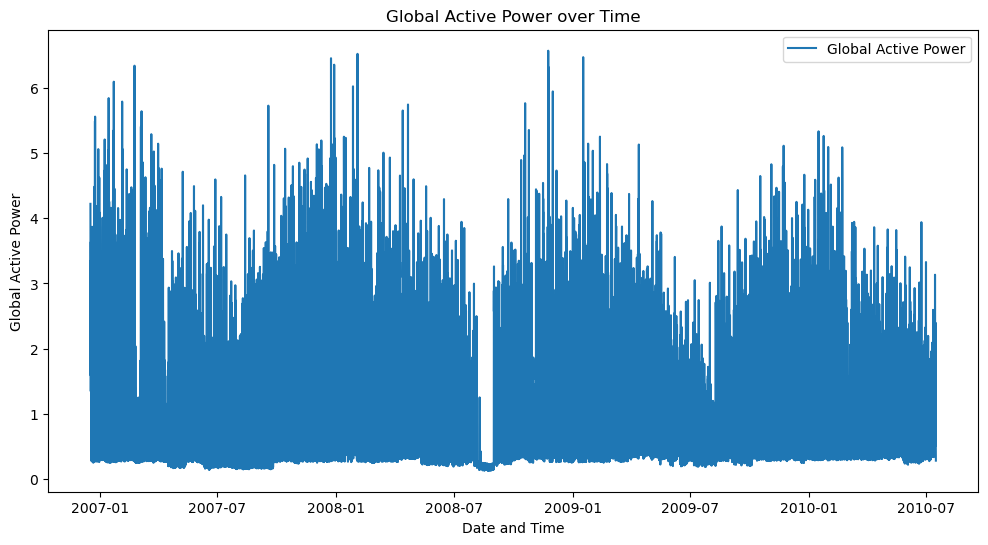

In [271]:
# Time series plot for Global Active Power
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date and Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.legend()
plt.show()

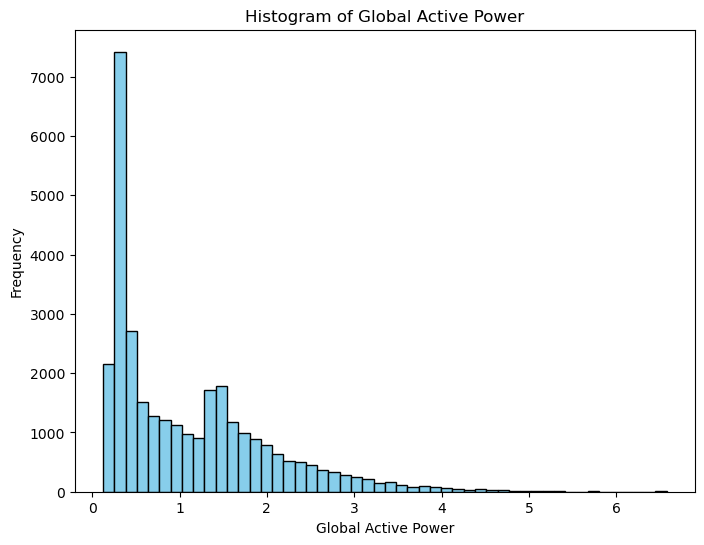

In [272]:
# Histogram of Global Active Power
plt.figure(figsize=(8, 6))
plt.hist(df['Global_active_power'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()


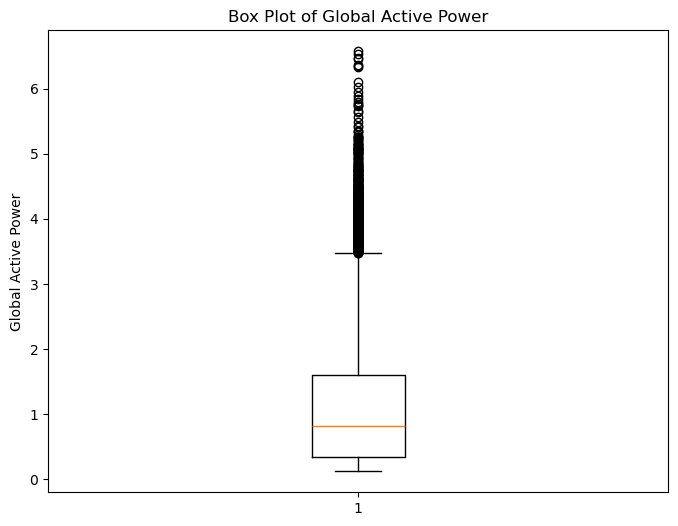

In [273]:
# Box plot of Global Active Power
plt.figure(figsize=(8, 6))
plt.boxplot(df['Global_active_power'])
plt.ylabel('Global Active Power')
plt.title('Box Plot of Global Active Power')
plt.show()


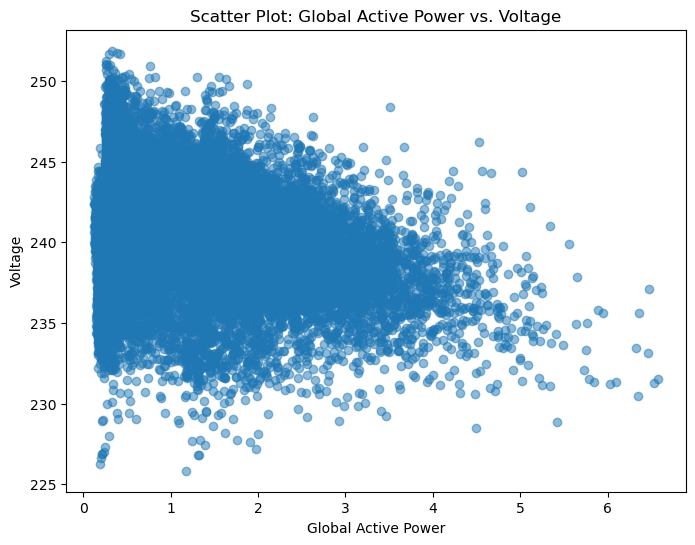

In [274]:
# Scatter plot of Global Active Power vs. Voltage
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Voltage'], alpha=0.5)
plt.xlabel('Global Active Power')
plt.ylabel('Voltage')
plt.title('Scatter Plot: Global Active Power vs. Voltage')
plt.show()


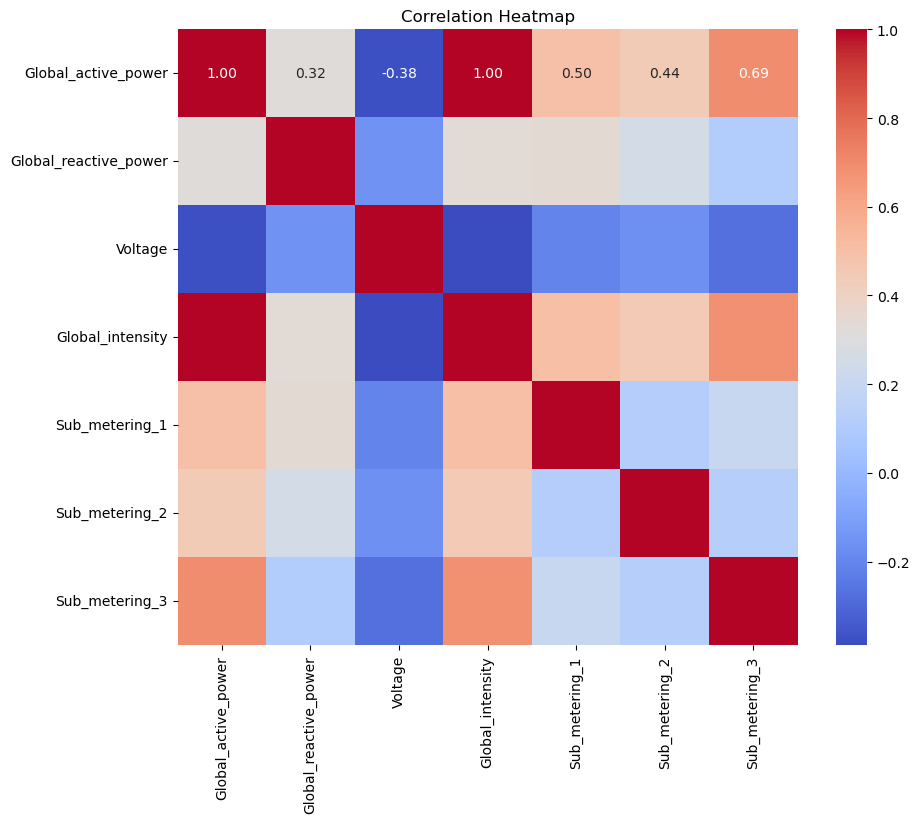

In [275]:
# Drop the target column from the correlation matrix (Reason: non-numeric column)
corr_matrix = df.drop(columns=['target']).corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

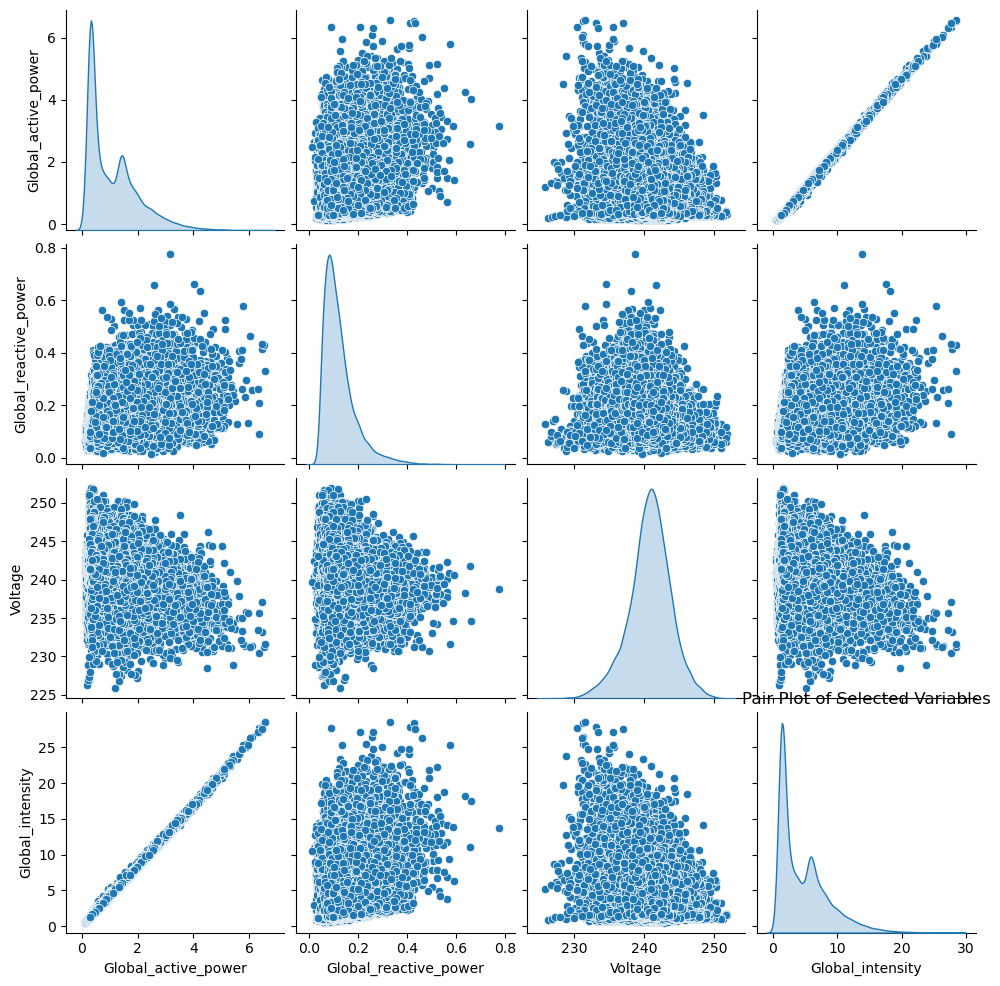

In [276]:
# Pair plot of dataset features
sns.pairplot(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], diag_kind='kde')
plt.title('Pair Plot of Selected Variables')
plt.show()


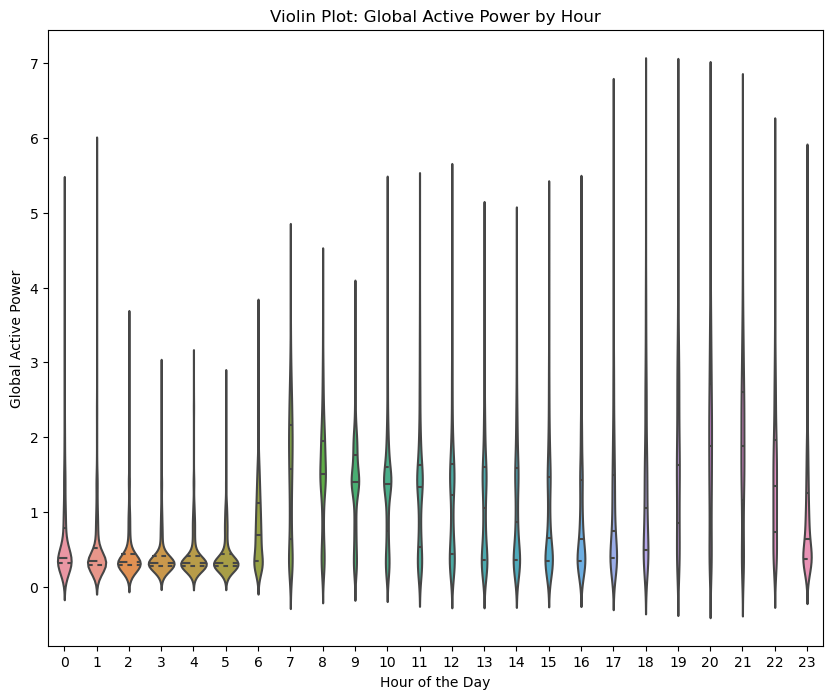

In [277]:
# Violin plot of Global Active Power by Hour
plt.figure(figsize=(10, 8))
sns.violinplot(x=df.index.hour, y=df['Global_active_power'], inner="quartile")
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power')
plt.title('Violin Plot: Global Active Power by Hour')
plt.show()


___
___
# Phase Two - Developing Machine Learning Models from the Dataset:

___
## Part One: SVM classification

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Creating a new set of data excluding Low target values:

In [279]:
model1_data = df[(df['target'] == 'Typical') | (df['target'] == 'High')]

X = model1_data.drop(columns=['target'])
y = (model1_data['target'] == 'High')  # True for 'High', False for 'Typical'

### Splitting training and testing sets (80 - 20 split):

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the SVM model:

In [281]:
SVM_typical_to_high = SVC(kernel='rbf', C=1.0, gamma='scale')
SVM_typical_to_high.fit(X_train, y_train)

SVC()

### Evaluation of the model:

In [282]:
y_pred = SVM_typical_to_high.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.99      0.95      3110
        True       0.99      0.78      0.87      1572

    accuracy                           0.92      4682
   macro avg       0.94      0.89      0.91      4682
weighted avg       0.93      0.92      0.92      4682



### Creating a new set of data excluding High target values:

In [283]:
model2_data = df[(df['target'] == 'Typical') | (df['target'] == 'Low')]

In [284]:
X = model2_data.drop(columns=['target'])
y = (model2_data['target'] == 'Low')  # True for 'Low', False for 'Typical'

### Splitting training and testing sets (80 - 20 split):

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the SVM model:

In [286]:
SVM_typical_to_low = SVC(kernel='rbf', C=1.0, gamma='scale')
SVM_typical_to_low.fit(X_train, y_train)

SVC()

### Evaluation of the model:

In [287]:
y_pred = SVM_typical_to_low.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.98      0.87      3058
        True       0.93      0.47      0.63      1580

    accuracy                           0.81      4638
   macro avg       0.86      0.73      0.75      4638
weighted avg       0.83      0.81      0.79      4638



### Saving the trained SVM models for later use:

In [288]:
# Save the trained models to files
dump(SVM_typical_to_high, 'SVM_typical_to_high.joblib')
dump(SVM_typical_to_low, 'SVM_typical_to_low.joblib')

['SVM_typical_to_low.joblib']

### Creating dummy data for testing:

In [289]:
# Example new data
new_data = pd.DataFrame({
    'Global_active_power': [2.0, 1.5, 0.2], 
    'Global_reactive_power': [0.2, 0.3, 0.25],
    'Voltage': [230.0, 235.0, 225.0],
    'Global_intensity': [8.0, 6.5, 10.0],
    'Sub_metering_1': [1.0, 0.5, 2.0],
    'Sub_metering_2': [0.5, 1.0, 0.75],
    'Sub_metering_3': [2.0, 1.5, 2.5]
})

# Display the new data
print("New Data:")
print(new_data)

New Data:
   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                  2.0                   0.20    230.0               8.0   
1                  1.5                   0.30    235.0               6.5   
2                  0.2                   0.25    225.0              10.0   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             1.0            0.50             2.0  
1             0.5            1.00             1.5  
2             2.0            0.75             2.5  


### Predicting new data using loaded SVM models:

___
## Part Two: Linear Regression

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [291]:
X = df.drop(columns=['Global_active_power', 'target'])  # Features minus Global_active_power and target
y = df['Global_active_power']  # Target variable

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [293]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [294]:
y_pred = linear_reg_model.predict(X_test)

In [295]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [296]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.0004013313016861429
R-squared Score: 0.9995130990324387


In [297]:
dump(linear_reg_model, 'ActiveEnergy_LinearRegression.joblib')

['ActiveEnergy_LinearRegression.joblib']

___
___
# PRACTICAL TESTING OF MODELS

## USER UI EXAMPLE TESTING:

### User must supply a CSV file containing values for the following:

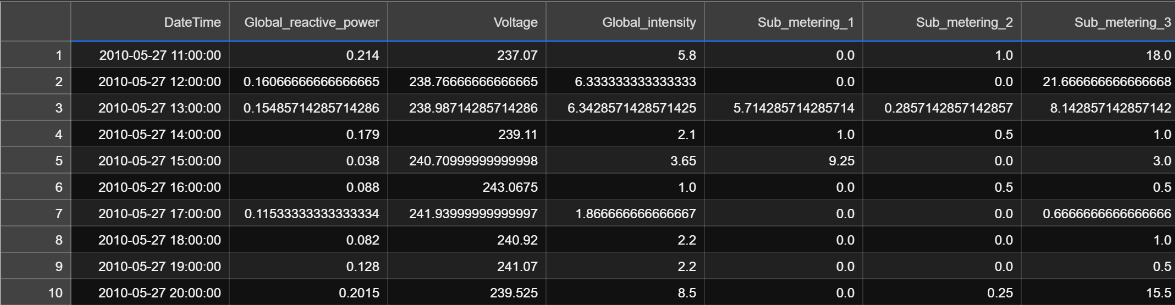

 #### Where variables are defined as the following:

 #### **1.datetime:** 
- DateTime in format dd/mm/yyyy hh : mm : ss
___
t #### **2
4.global_reactive_pow**e
- r: household globhourute-averaged reactive poer (in kilowa
___
t #### **3)
5.volt**a
- ge: minute-averaged volage (in v
___
o #### **4t)
6.global_inten**s
- ity: household glhourinute-averaged current intesity (in am
___
p #### **5re)
7.sub_meter**i
- ng_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powe___

 #### **6ed).
8.sub_mete**r
- ing_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a ___

 #### **7ight.
9.sub_met**e
- ring_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.0

In [298]:
df_test = pd.read_csv('Company_Data.csv', delimiter=',', low_memory=False)

In [299]:
df_test.head()

,DateTime,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2010-06-04 16:00:00,0.077000,239.283667,6.133333,0.0,0.066667,19.116667
1,2010-06-04 17:00:00,0.150567,240.398500,3.400000,0.0,0.466667,8.716667
2,2010-06-04 18:00:00,0.212576,241.204915,2.291525,0.0,0.322034,1.610169
3,2010-06-04 19:00:00,0.204800,241.753667,1.760000,0.0,0.233333,0.650000
4,2010-06-04 20:00:00,0.222567,243.747500,2.166667,0.0,0.500000,1.566667


In [300]:
# Load the saved models from files
loaded_SVM_typical_to_high = load('SVM_typical_to_high.joblib')
loaded_SVM_typical_to_low = load('SVM_typical_to_low.joblib')
loaded_linear_reg_model = load('ActiveEnergy_LinearRegression.joblib')

In [301]:
df_test.set_index('DateTime', inplace=True)

In [302]:
predictions = loaded_linear_reg_model.predict(df_test)

df_test['Global_active_power'] = predictions

columns_order = ['Global_active_power'] + df_test.columns[df_test.columns != 'Global_active_power'].tolist()
df_test = df_test.reindex(columns=columns_order)

SVM_Ready_df = df_test
SVM_Ready_df.index = pd.to_datetime(SVM_Ready_df.index)

In [303]:
predictions_model_one = loaded_SVM_typical_to_high.predict(SVM_Ready_df)
predictions_model_two = loaded_SVM_typical_to_low.predict(SVM_Ready_df)

#print("Predictions from Model One:") # False is typical, True is high
#print(predictions_model_one)
#print("\nPredictions from Model Two:") # False is typical, True is low
#print(predictions_model_two)

## The following shows data that can be showed back to the user via the UI system:

In [304]:
# Count the occurrences of True values in predictions_model_one
true_count1 = sum(predictions_model_one)
# Print the count of True values
print("Number of True values (High energy usage) predicted by Model One:", true_count1)

# Count the occurrences of True values in predictions_model_two
true_count2 = sum(predictions_model_two)
# Print the count of True values
print("Number of True values (Low energy usage) predicted by Model Two:", true_count2)

typical_sum = SVM_Ready_df.shape[0] - true_count1 - true_count2
print("Number of False-False values (Typical energy usage) predicted by the SVM Models:", typical_sum)


mean = sum(predictions) / len(predictions) 
variance = sum([((x - mean) ** 2) for x in predictions]) / len(predictions) 
res = variance ** 0.5
 
# Printing result 
print("\nLength of list : " + str(len(predictions)))
print("\nMean of sample is : " + str(mean)) 
print("Mean of daily sample is : " + str(mean * 24)) 
print("\nMax of sample is : " + str(max(predictions)))
print("Max of daily sample is : " + str(max(predictions) * 24)) 
print("\nMin of sample is : " + str(min(predictions)))
print("Min of daily sample is : " + str(min(predictions) * 24)) 
print("\nStandard deviation of sample is : " + str(res)) 

Number of True values (High energy usage) predicted by Model One: 123
Number of True values (Low energy usage) predicted by Model Two: 12
Number of False-False values (Typical energy usage) predicted by the SVM Models: 865

Length of list : 1000

Mean of sample is : 0.9359137189084167
Mean of daily sample is : 22.461929253802

Max of sample is : 3.9805137021021926
Max of daily sample is : 95.53232885045261

Min of sample is : 0.23581375096727353
Min of daily sample is : 5.659530023214565

Standard deviation of sample is : 0.6105894770493557


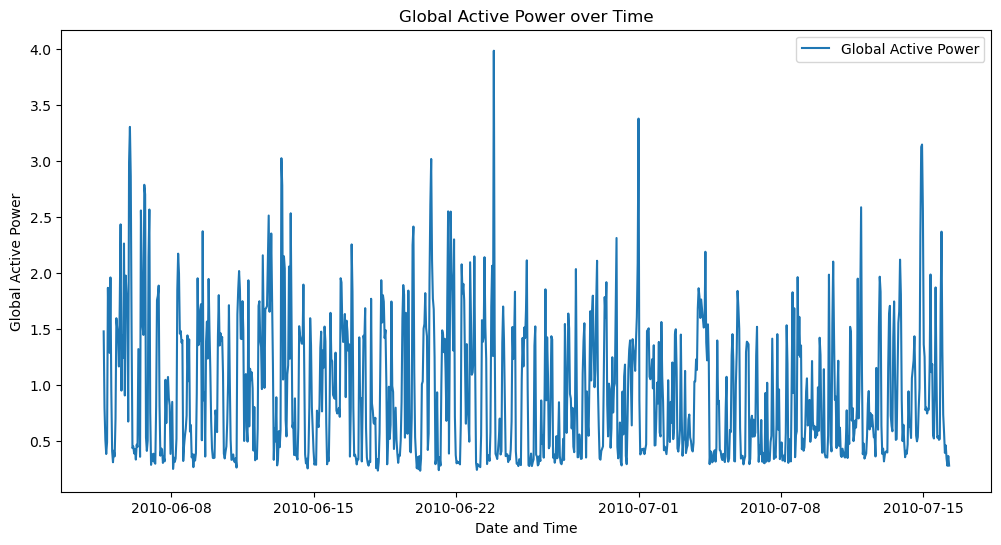

In [305]:
# Time series plot for Global Active Power
plt.figure(figsize=(12, 6))
plt.plot(SVM_Ready_df.index, SVM_Ready_df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date and Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.legend()
plt.show()

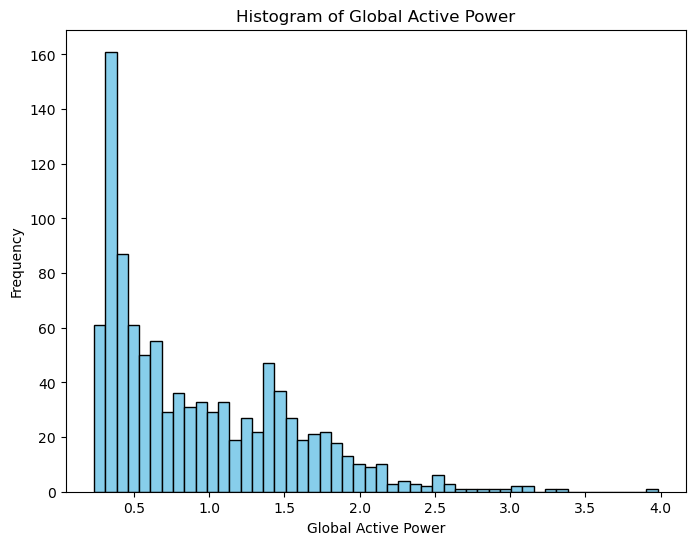

In [306]:
# Histogram of Global Active Power
plt.figure(figsize=(8, 6))
plt.hist(SVM_Ready_df['Global_active_power'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()


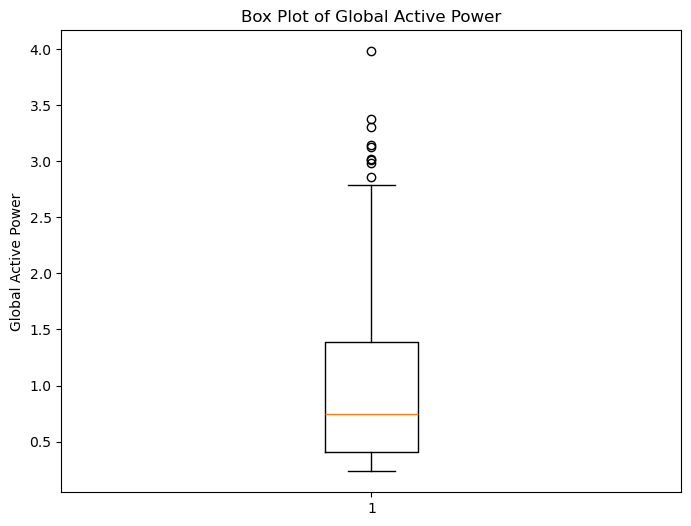

In [307]:
# Box plot of Global Active Power
plt.figure(figsize=(8, 6))
plt.boxplot(SVM_Ready_df['Global_active_power'])
plt.ylabel('Global Active Power')
plt.title('Box Plot of Global Active Power')
plt.show()

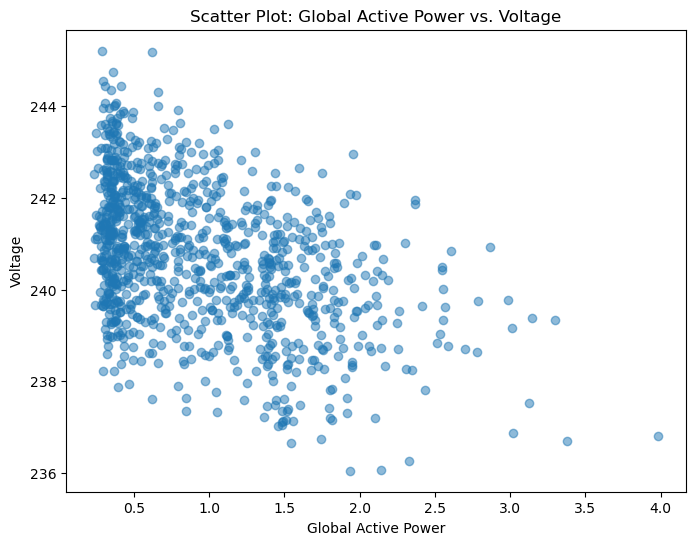

In [308]:
# Scatter plot of Global Active Power vs. Voltage
plt.figure(figsize=(8, 6))
plt.scatter(SVM_Ready_df['Global_active_power'], SVM_Ready_df['Voltage'], alpha=0.5)
plt.xlabel('Global Active Power')
plt.ylabel('Voltage')
plt.title('Scatter Plot: Global Active Power vs. Voltage')
plt.show()

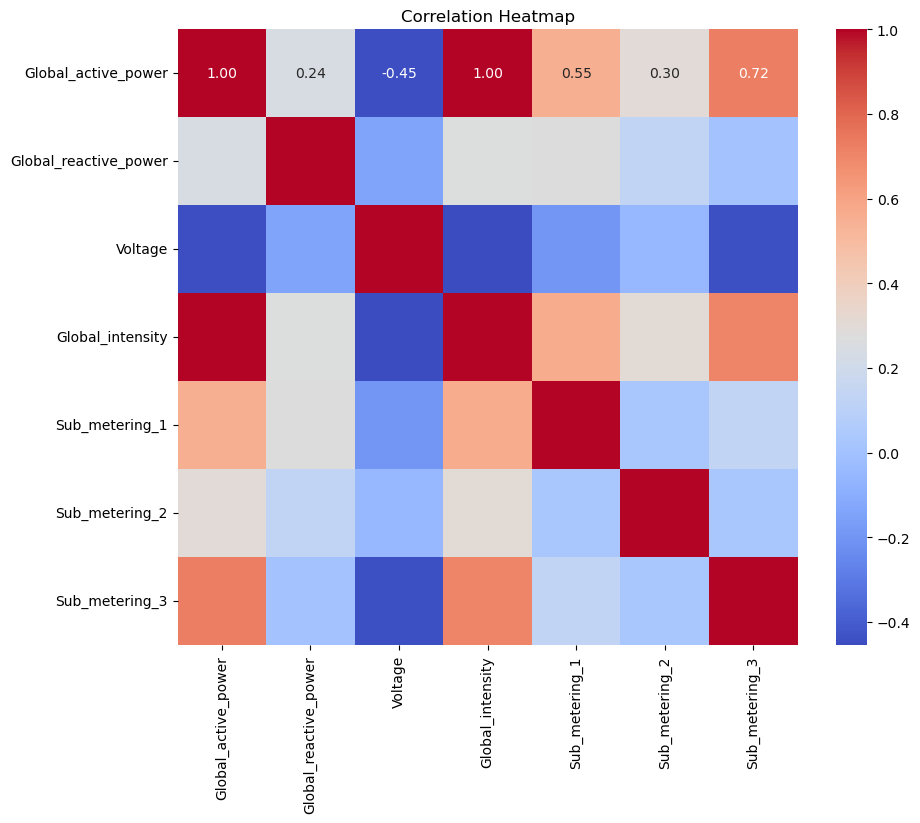

In [309]:
# Drop the target column from the correlation matrix (Reason: non-numeric column)
corr_matrix = SVM_Ready_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

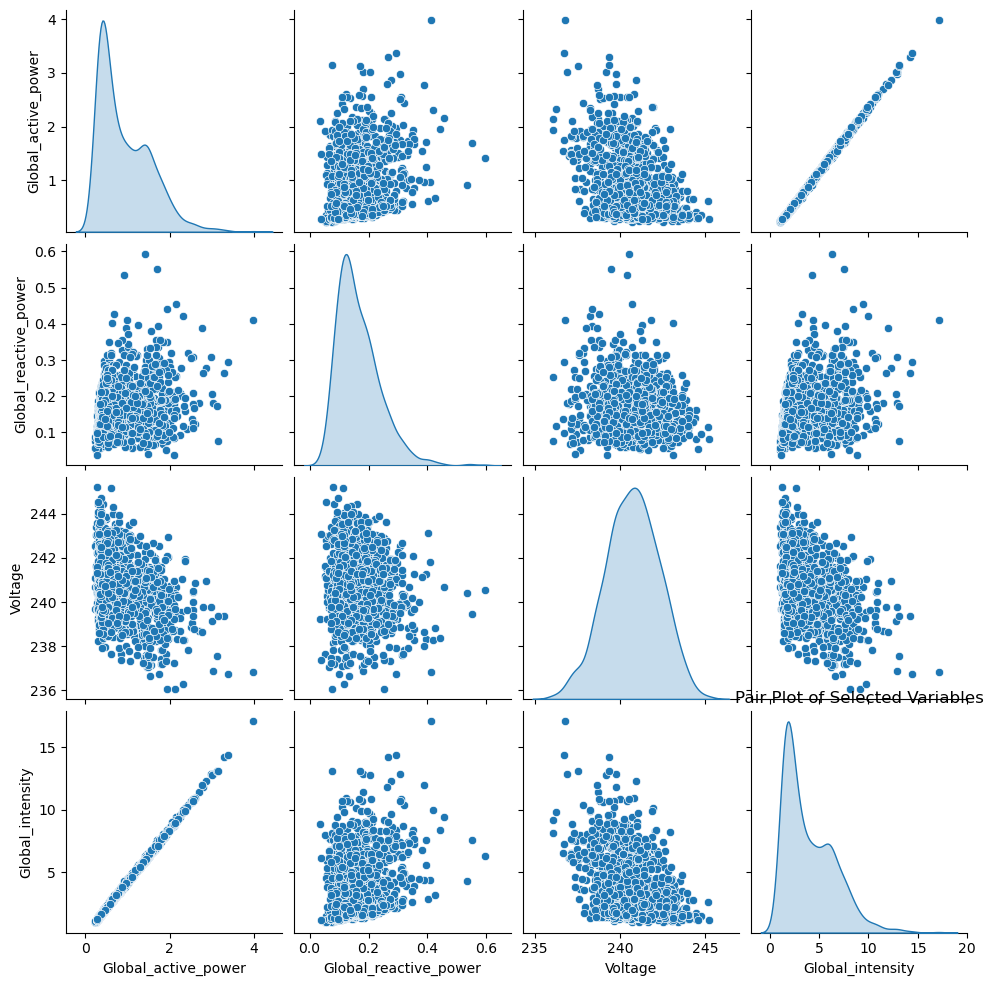

In [310]:
# Pair plot of dataset features
sns.pairplot(SVM_Ready_df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], diag_kind='kde')
plt.title('Pair Plot of Selected Variables')
plt.show()

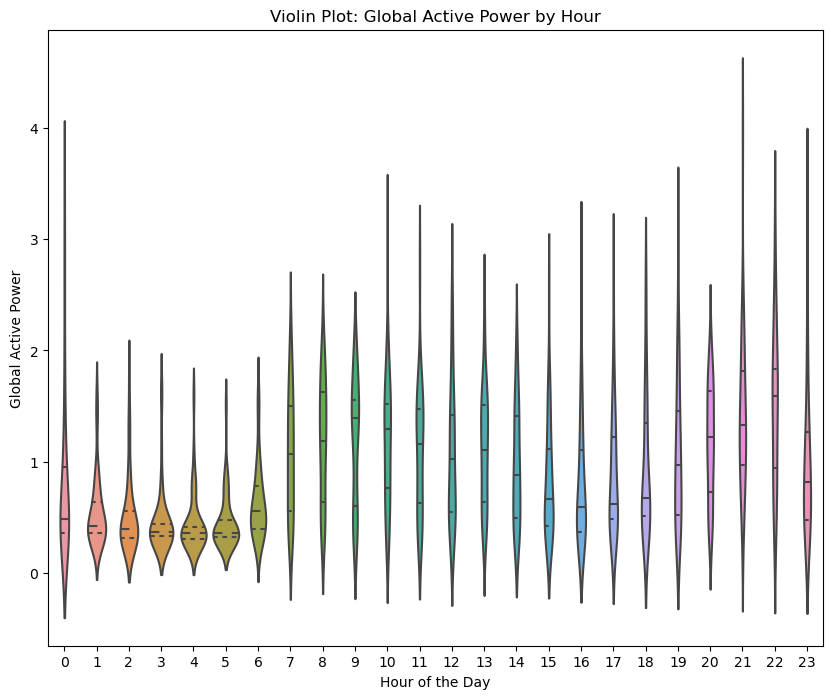

In [311]:
# Violin plot of Global Active Power by Hour
plt.figure(figsize=(10, 8))
sns.violinplot(x=SVM_Ready_df.index.hour, y=SVM_Ready_df['Global_active_power'], inner="quartile")
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power')
plt.title('Violin Plot: Global Active Power by Hour')
plt.show()